In [15]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.externals import joblib

import spdivik.summary as smr
smr.scale_plot_size(4.)

In [16]:
# root = r"C:\Users\Grzegorz\Desktop\thyroid-cancer-cores-merged-all"
root = r"E:\hnc-master-thesis\data_HNC_master_thesis"
result_path = os.path.join(root, "divik-result-proteomic.jbl")
metadata_path = os.path.join(root, "metadata.csv")

In [17]:
metadata = pd.read_csv(metadata_path)
metadata = metadata[metadata.dataset == 1]
metadata.diagnosis[(metadata.diagnosis == 'connective') | (metadata.diagnosis == 'gland') | (metadata.diagnosis == 'muscle')] = 'healthy'
result = joblib.load(result_path)

In [18]:
smr.depth(result)

15

In [19]:
smr.total_number_of_clusters(result)

383

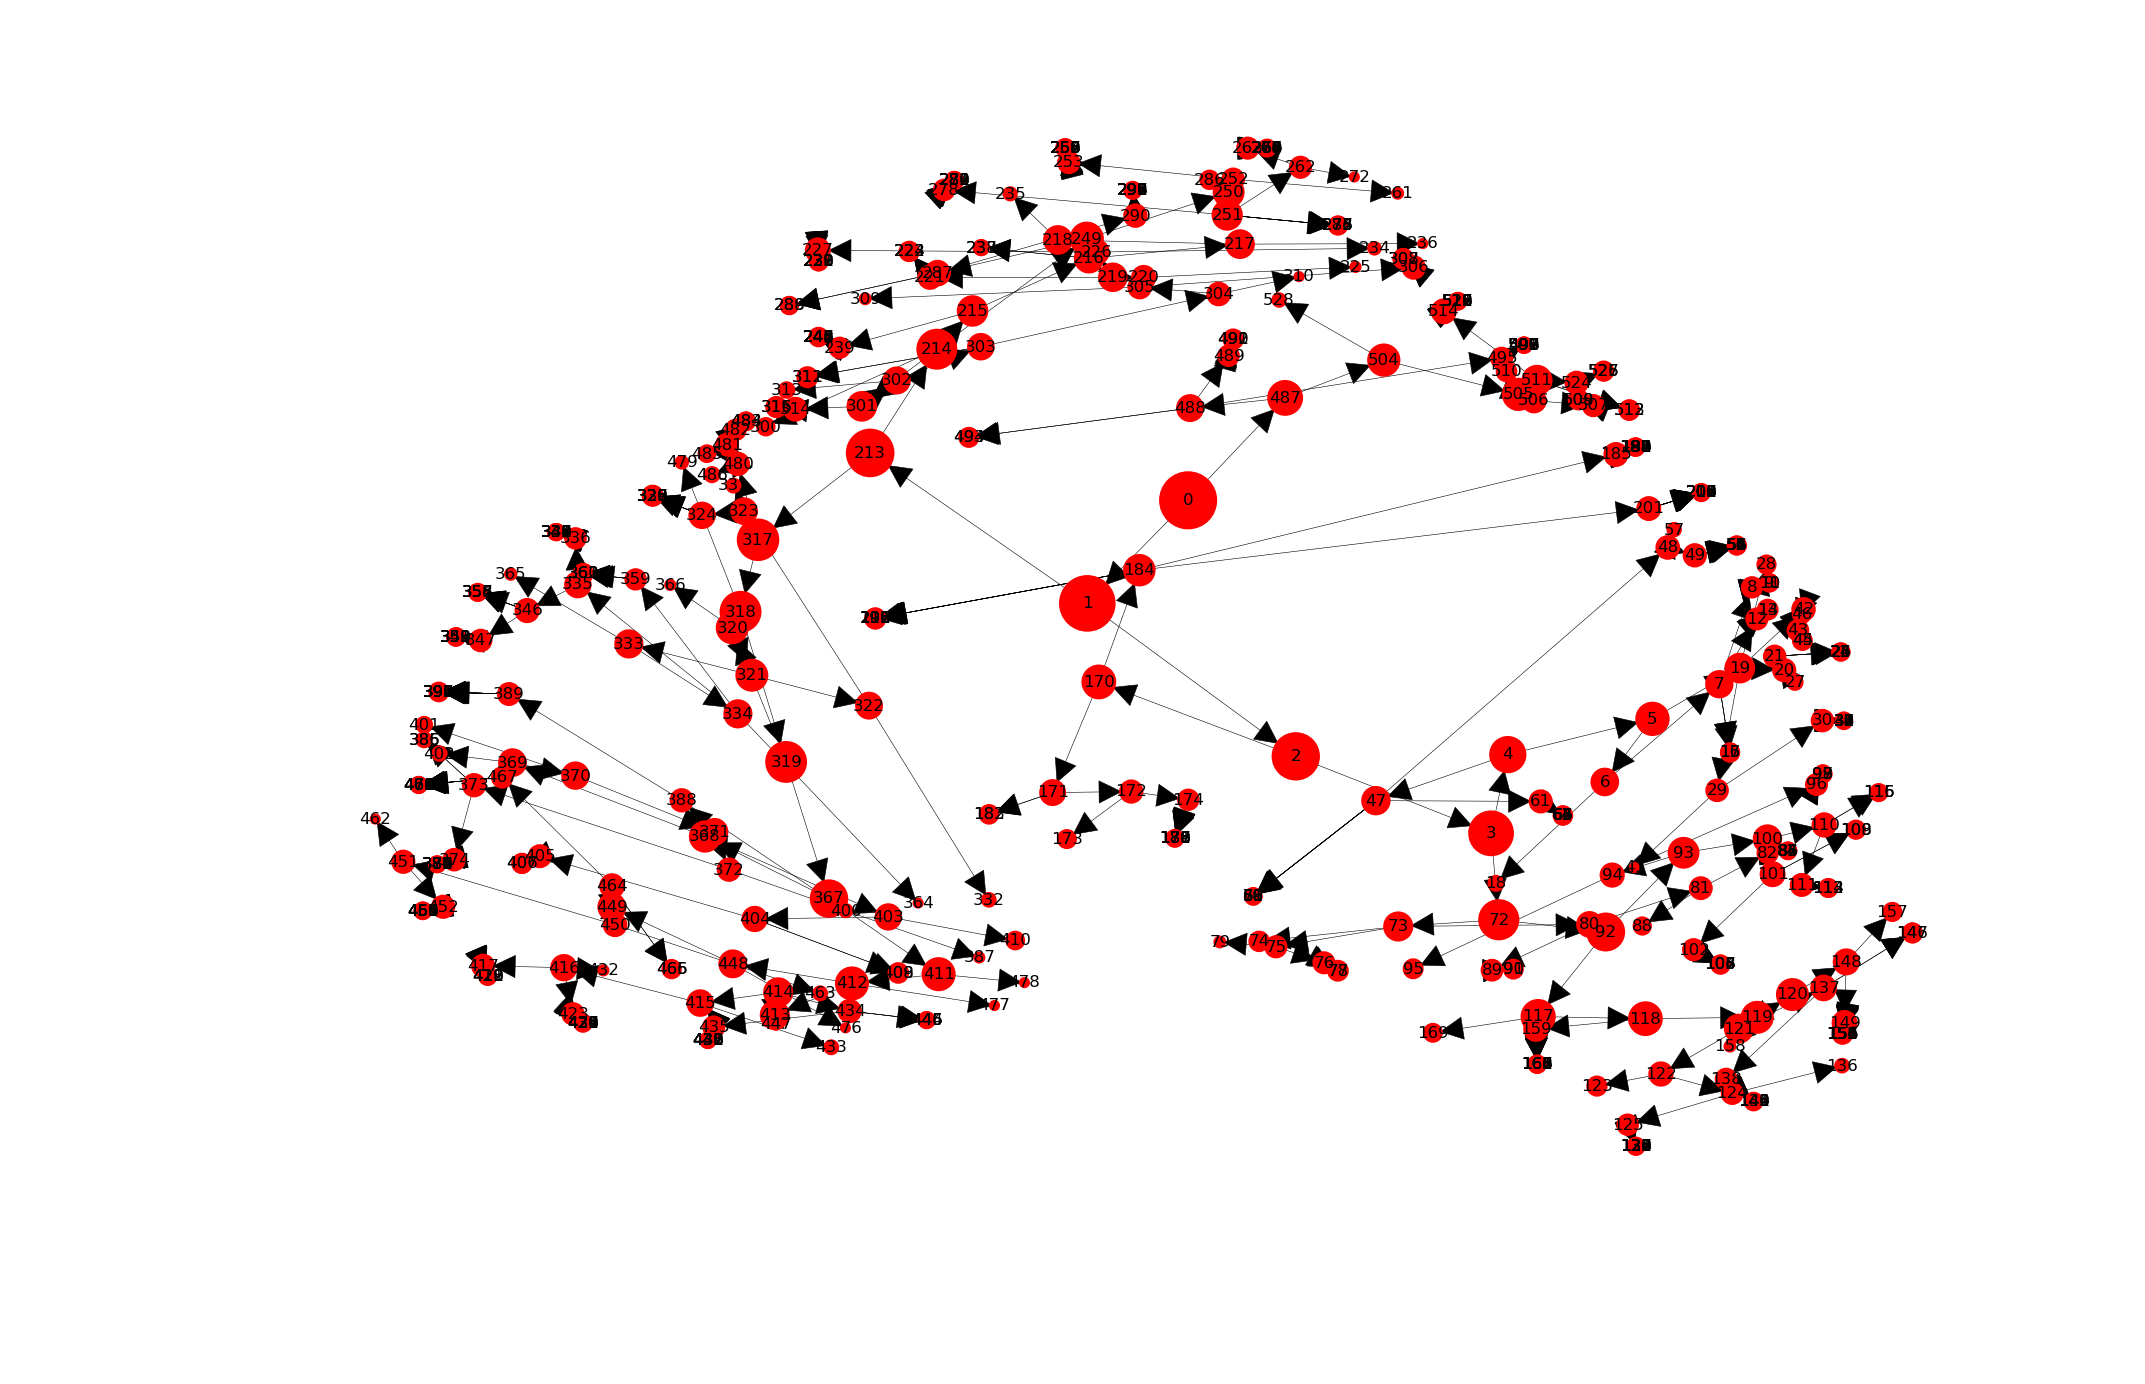

In [20]:
smr.plot(result)

In [21]:
def as_image(labels, x, y):
    x, y = np.array(x), np.array(y)
    x, y = x - x.min() + 1, y - y.min() + 1
    image = np.nan * np.zeros((y.max() + 1, x.max() + 1))
    image[y, x] = labels
    return image

['cancer' 'epithelium' 'healthy']


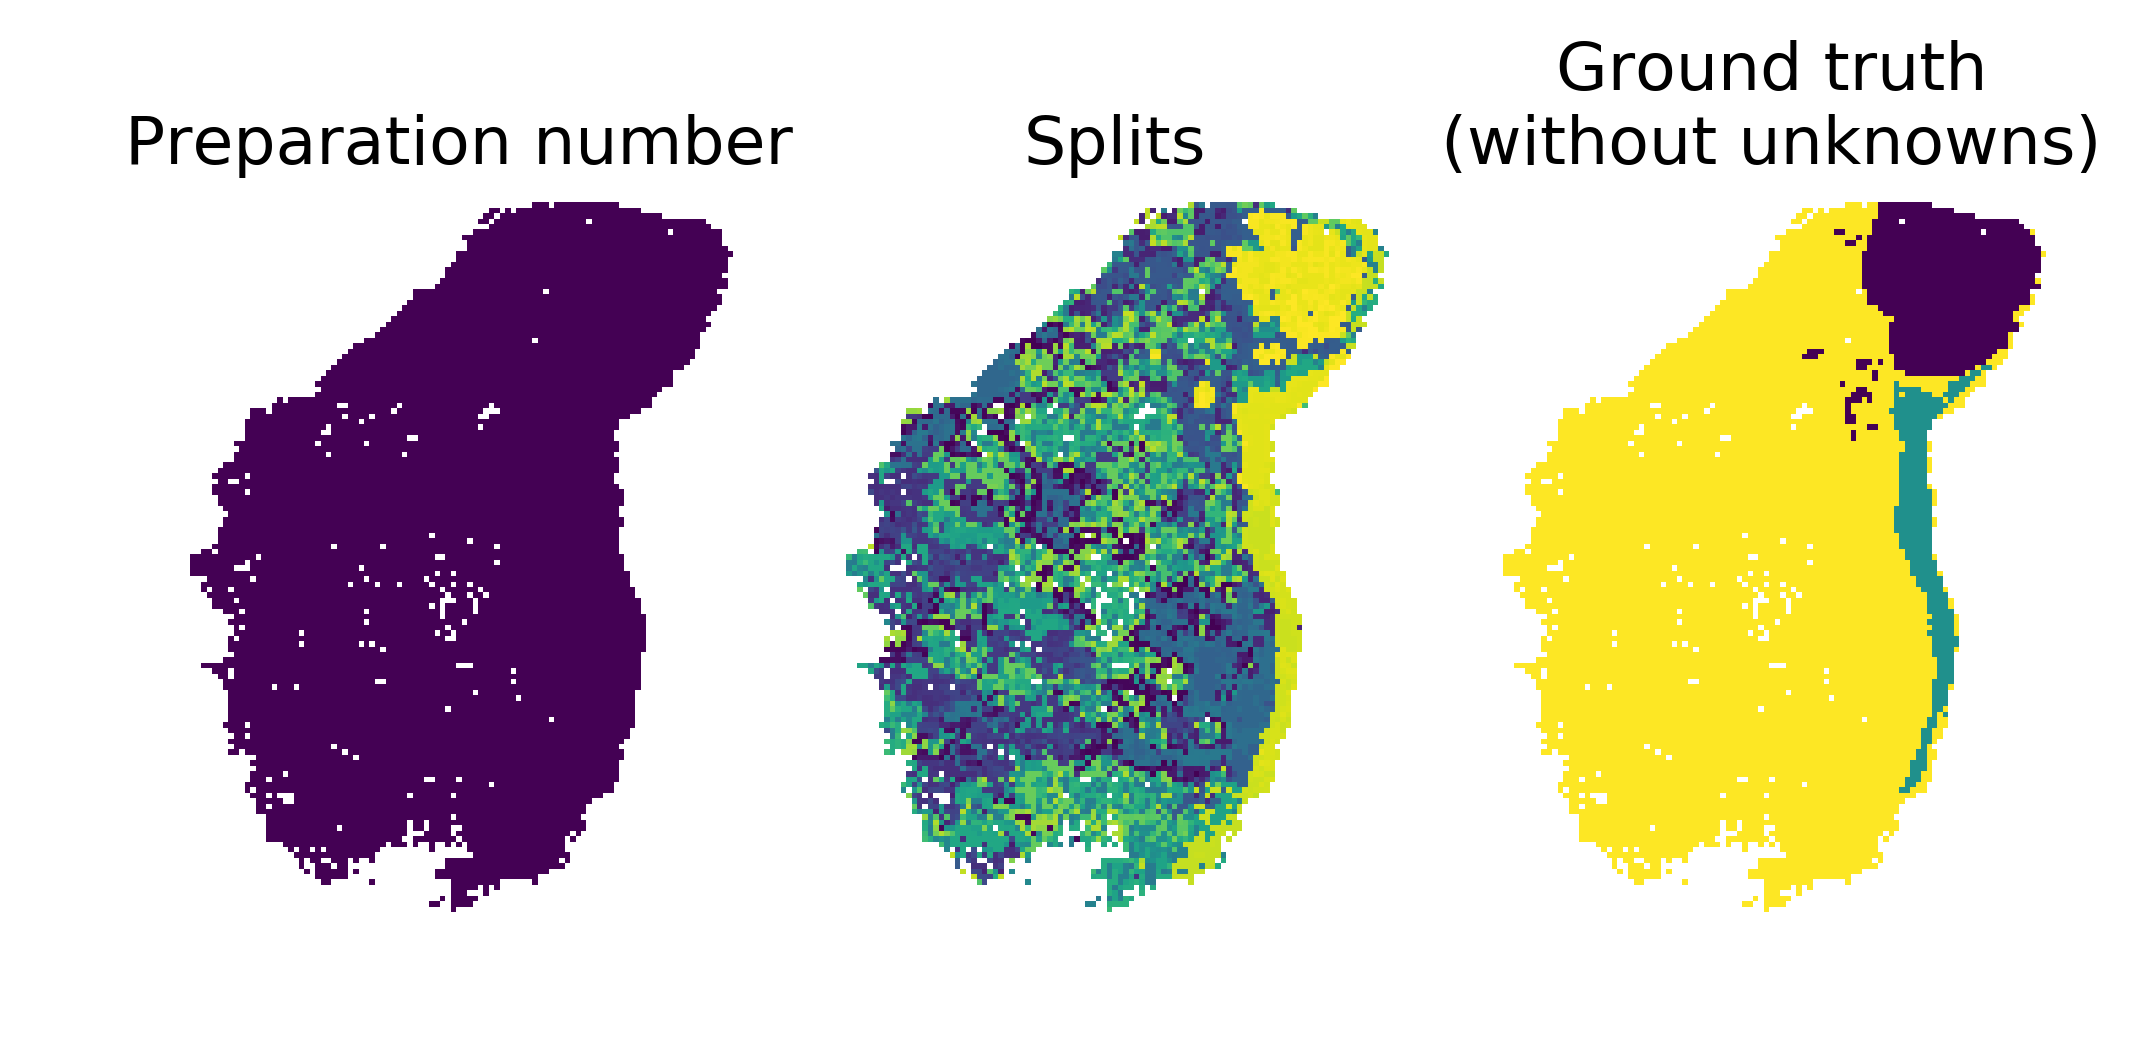

In [22]:
preparations = as_image(metadata.dataset, metadata.X, metadata.Y)

figure, axes = plt.subplots(1, 3)
axes[0].imshow(preparations)
axes[0].axis('off')
axes[0].set_title('Preparation number')

merged = smr.merged_partition(result)
# topmost = as_image(result.partition, metadata.X, metadata.Y)
topmost = as_image(merged, metadata.X, metadata.Y)

axes[1].imshow(topmost)
axes[1].axis('off')
axes[1].set_title('Splits')

diagnoses = np.unique(metadata.diagnosis)
print(diagnoses)
numerical_diagnosis = np.argmax(diagnoses[np.newaxis, :] == metadata.diagnosis[:, np.newaxis], axis=1).astype(float)
numerical_diagnosis[np.logical_or(metadata.diagnosis == '?', metadata.diagnosis == '????')] = np.nan
ground_truth = as_image(numerical_diagnosis, metadata.X, metadata.Y)
axes[2].imshow(ground_truth)
axes[2].axis('off')
axes[2].set_title('Ground truth\n(without unknowns)')

plt.show()

In [23]:
smr.statistic(merged, metadata.diagnosis, smr.dice)

,cancer,epithelium,healthy
0,0.000000,0.000000,0.011111
1,0.000000,0.000000,0.002643
2,0.000000,0.000000,0.010529
3,0.000000,0.000000,0.021524
4,0.000000,0.000000,0.007324
5,0.000000,0.000000,0.014594
6,0.000000,0.000000,0.000294
7,0.000000,0.000000,0.013725
8,0.000000,0.000000,0.005279
9,0.000000,0.000000,0.005863


In [24]:
smr.statistic(merged, metadata.diagnosis, smr.positive_predictive_value)

,cancer,epithelium,healthy
0,0.000000,0.000000,1.000000
1,0.000000,0.000000,1.000000
2,0.000000,0.000000,1.000000
3,0.000000,0.000000,1.000000
4,0.000000,0.000000,1.000000
5,0.000000,0.000000,1.000000
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
8,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000


In [25]:
smr.statistic(merged, metadata.diagnosis, smr.true_positive_rate)

,cancer,epithelium,healthy
0,0.000000,0.000000,0.005587
1,0.000000,0.000000,0.001323
2,0.000000,0.000000,0.005293
3,0.000000,0.000000,0.010879
4,0.000000,0.000000,0.003675
5,0.000000,0.000000,0.007351
6,0.000000,0.000000,0.000147
7,0.000000,0.000000,0.006910
8,0.000000,0.000000,0.002646
9,0.000000,0.000000,0.002940


(array([  10.,   48.,  382., 1081., 1072.,  629.,  318.,  103.,   44.,
          27.]),
 array([0.11161591, 0.19022672, 0.26883752, 0.34744832, 0.42605912,
        0.50466993, 0.58328073, 0.66189153, 0.74050234, 0.81911314,
        0.89772394]),
 <a list of 10 Patch objects>)

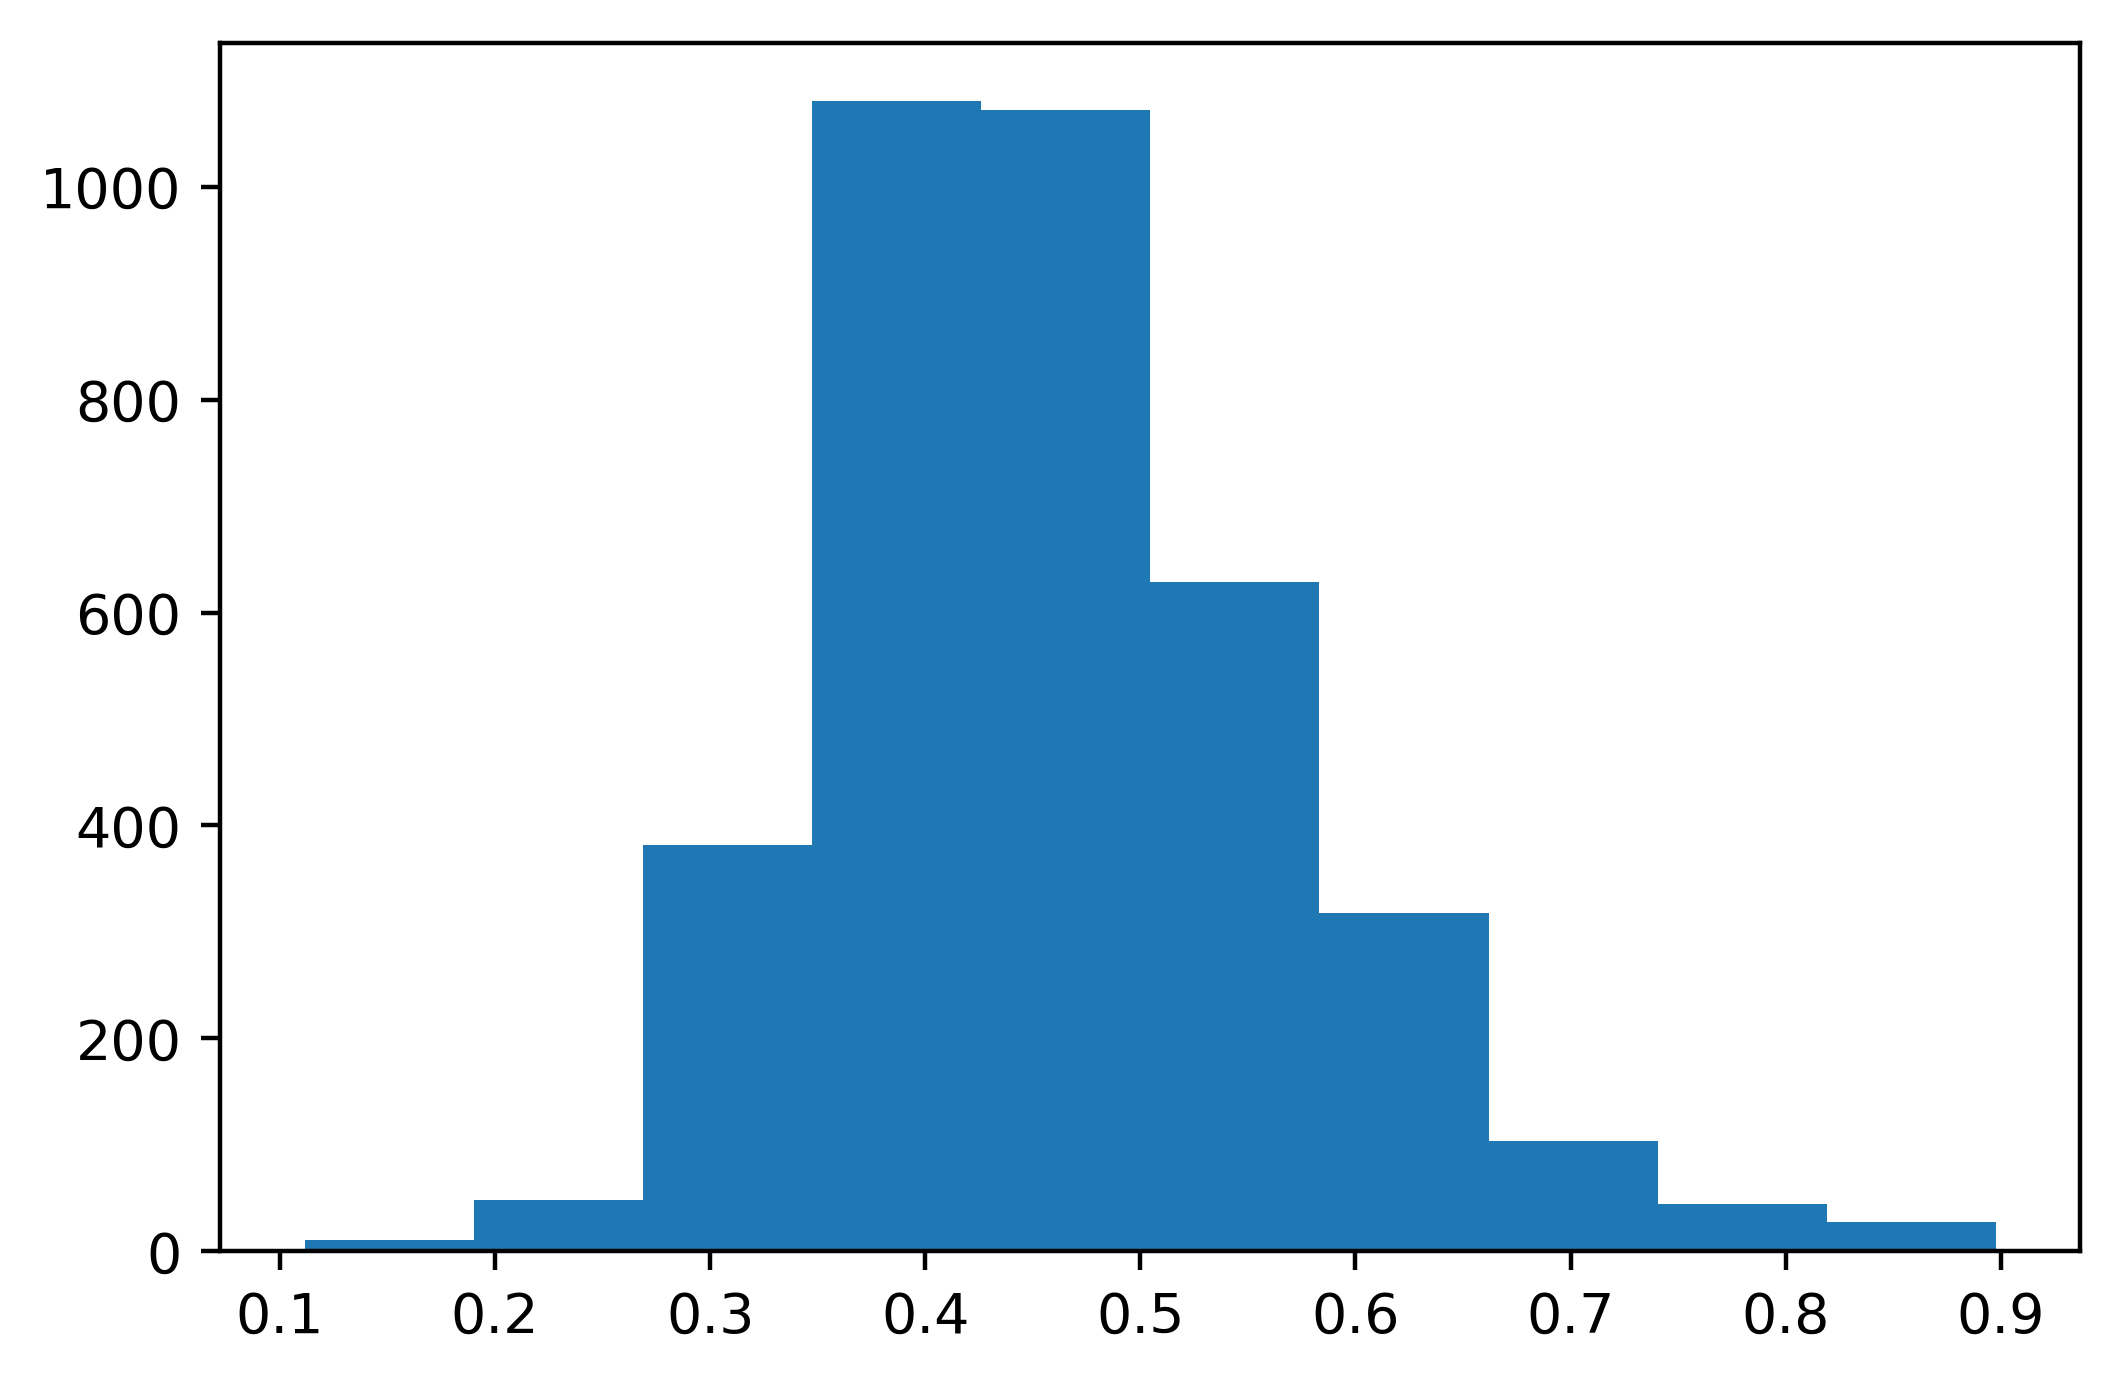

In [26]:
import spdivik.magic_anova as an

data = np.load(os.path.join(root, 'spectra.npy'))
data = data[:metadata.shape[0]]
groups = [group.values for _, group in pd.DataFrame(data).groupby(merged)]

def eta(*groups):
    return np.array([
        an.EffectSize(*[group[:, i] for group in groups])
        for i in range(groups[0].shape[1])
    ])

etas = eta(*groups)

(array([  2.,   1.,   0.,   4.,   2.,   1.,   3.,   7.,   8.,  10.,   8.,
         12.,  21.,  38.,  47.,  64.,  92., 120., 150., 165., 187., 187.,
        202., 190., 228., 220., 234., 130., 132., 128., 113., 115., 125.,
         92., 100.,  84.,  82.,  64.,  57.,  47.,  42.,  26.,  21.,  37.,
         15.,  12.,  12.,   6.,   8.,   6.,   7.,   8.,   8.,   7.,   5.,
          5.,   5.,   3.,   4.,   5.]),
 array([0.11161591, 0.12471771, 0.13781951, 0.15092131, 0.16402311,
        0.17712491, 0.19022672, 0.20332852, 0.21643032, 0.22953212,
        0.24263392, 0.25573572, 0.26883752, 0.28193932, 0.29504112,
        0.30814292, 0.32124472, 0.33434652, 0.34744832, 0.36055012,
        0.37365192, 0.38675372, 0.39985552, 0.41295732, 0.42605912,
        0.43916092, 0.45226272, 0.46536453, 0.47846633, 0.49156813,
        0.50466993, 0.51777173, 0.53087353, 0.54397533, 0.55707713,
        0.57017893, 0.58328073, 0.59638253, 0.60948433, 0.62258613,
        0.63568793, 0.64878973, 0.66189153, 0.

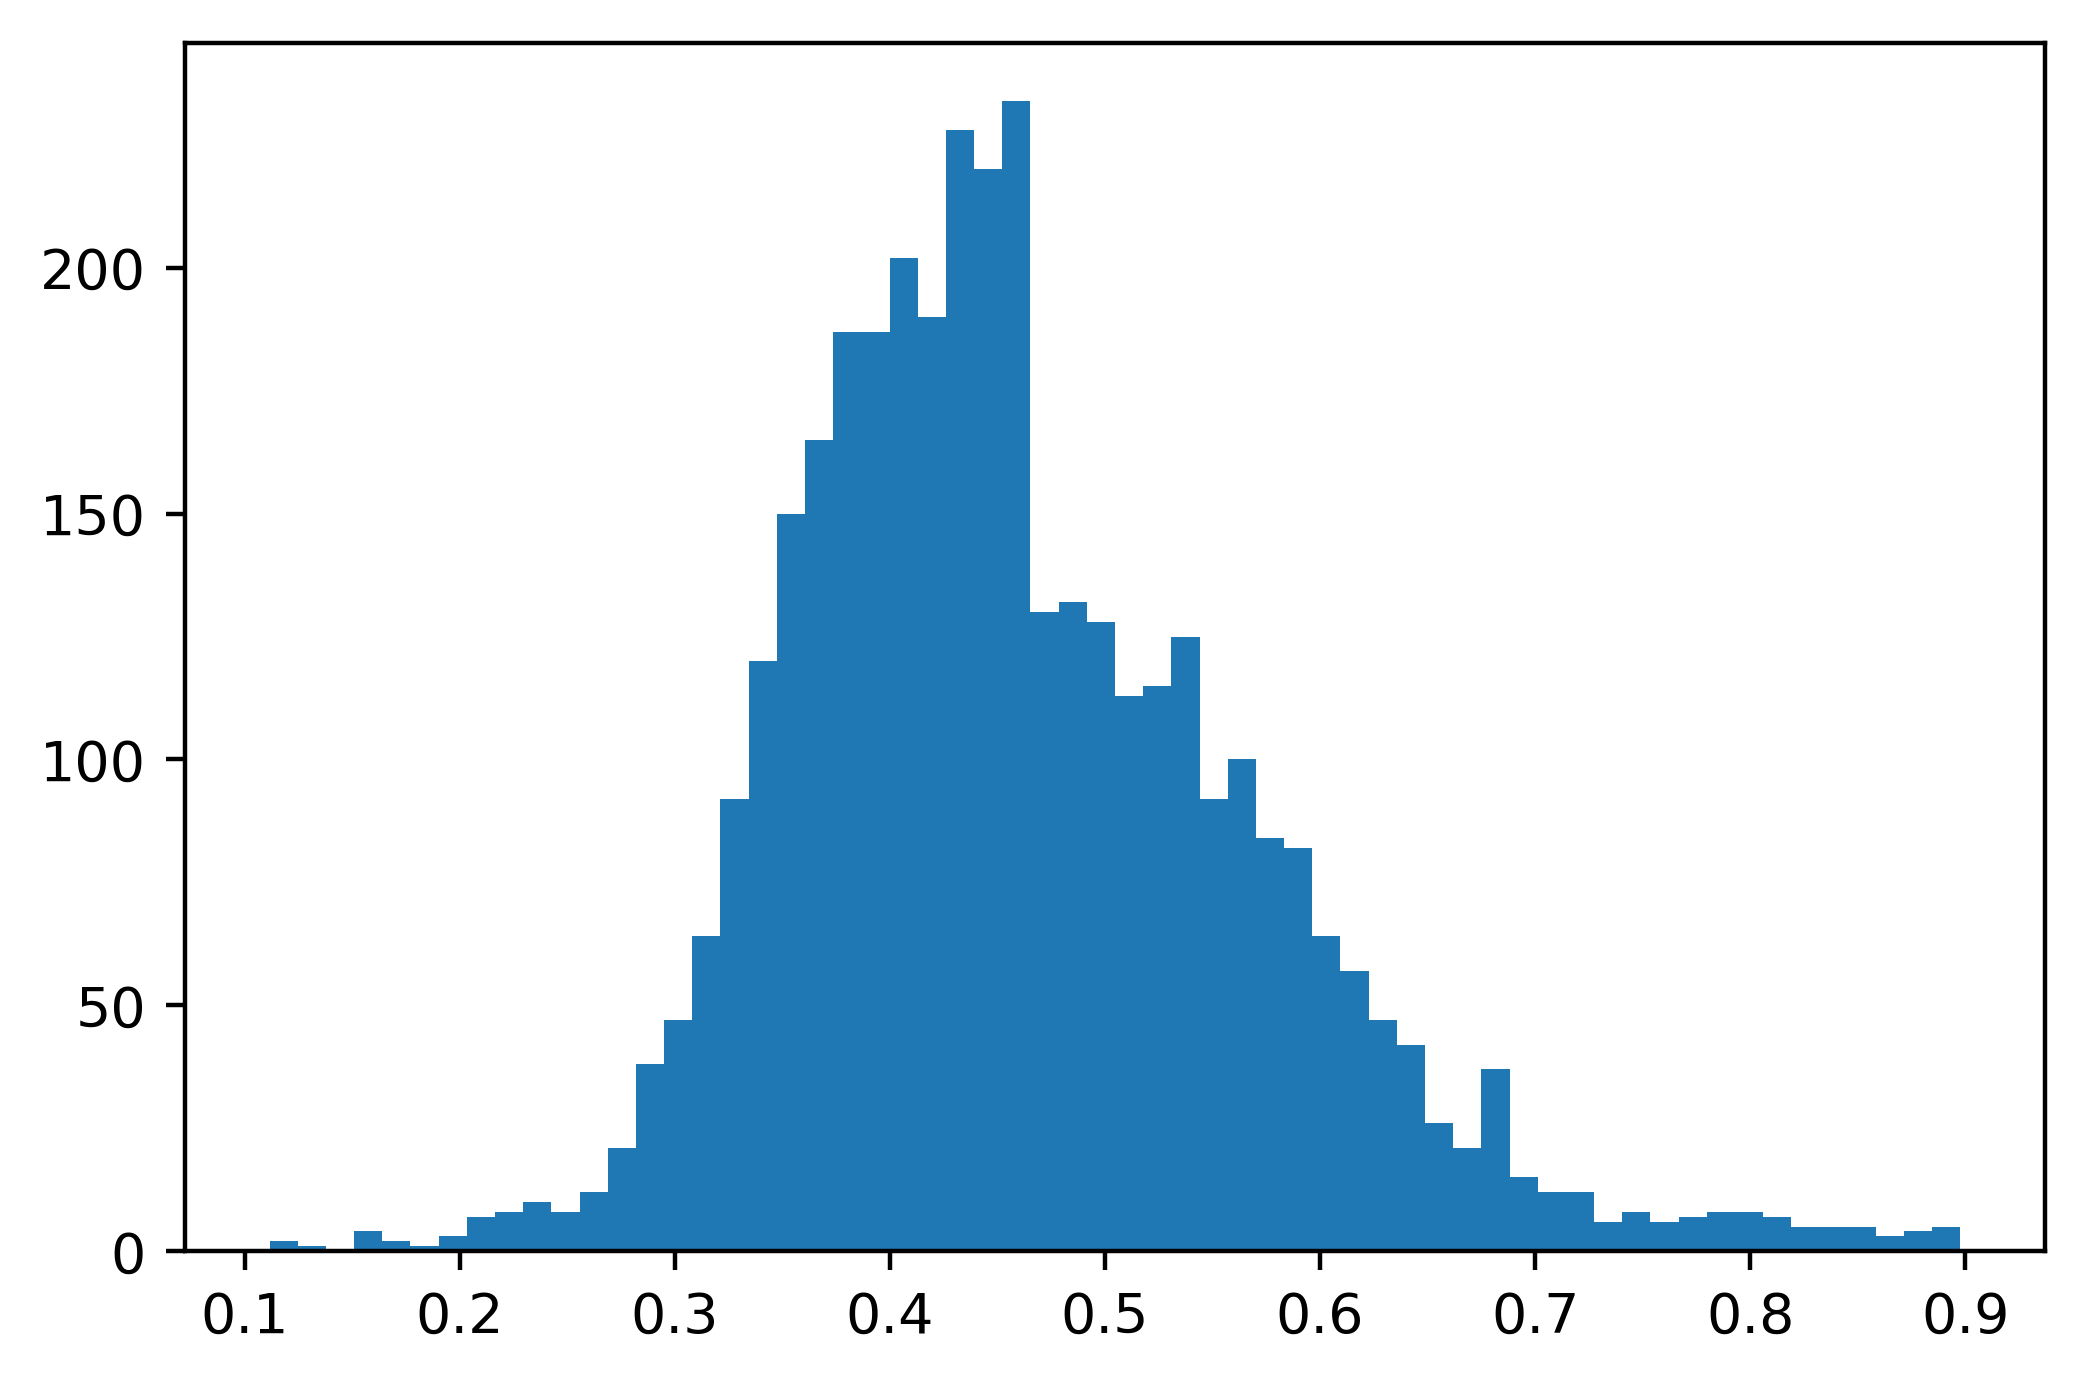

In [29]:
plt.hist(etas, bins=int(np.sqrt(etas.size)))

In [27]:
np.median(etas)

0.4457541994322522

In [28]:
pd.DataFrame({
    'at least small': [np.sum(etas > 0.02)],
    'at least medium': [np.sum(etas > .13)],
    'at least large': [np.sum(etas > .26)]
}, index=['effect size'])

,at least large,at least medium,at least small
effect size,3665,3712,3714
